Importing important libraries.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset.

In [9]:
df = pd.read_csv('milk_data.csv')

Performing EDA on the dataset named 'df'.

In [4]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [9]:
df.shape

(1059, 8)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [11]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


1. There are the outliers as well as the duplicated values present in the dataset
2. So now we are dealing with the duplicated values.

In [13]:
df.duplicated().sum()

976

In [14]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [19]:
from scipy import stats
tb = stats.boxcox(df['Temprature'])[0]
pd.Series(tb).skew()

0.0

In [10]:
df['Grade'].replace({'high' : 2,'medium' : 1,'low' : 0},inplace = True)
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,2
1,6.6,36,0,1,0,1,253,2
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,0,0,0,0,255,1


In [11]:
df.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1054,6.7,45,1,1,0,0,247,1
1055,6.7,38,1,0,1,0,255,2
1056,3.0,40,1,1,1,1,255,0
1057,6.8,43,1,0,1,0,250,2
1058,8.6,55,0,1,1,1,255,0


Plotting the density chart.

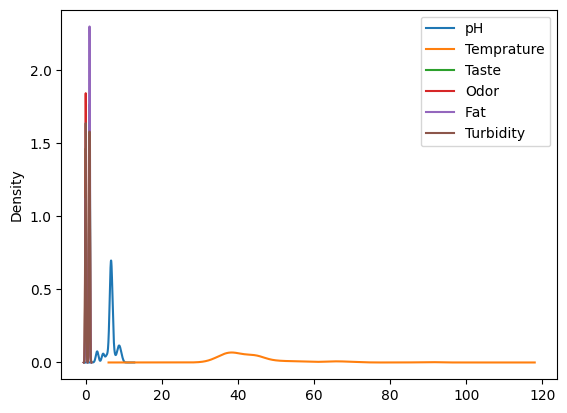

In [22]:
col = df.columns[:6]
dp = df[col].plot(kind = 'density')

In [12]:
#Finding the grade value
df.Grade.value_counts()

Grade
0    429
1    374
2    256
Name: count, dtype: int64

Creating the bar plot for the Grade attribute against all values.

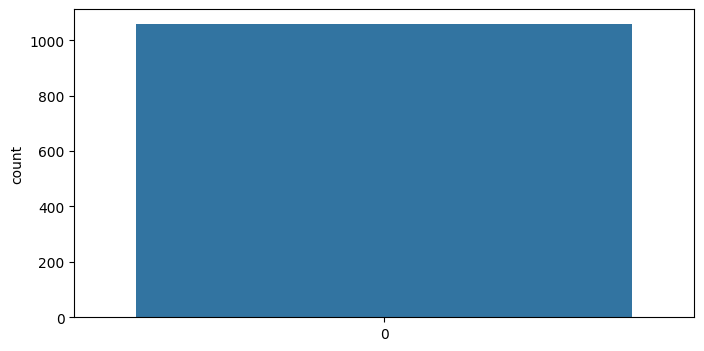

In [13]:
plt.figure(figsize = (8,4))
sns.countplot(df['Grade'])
plt.show()

Finding the correlation.

In [34]:
df.corr()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565,0.028980
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511,-0.417789
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654,0.025500
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361,0.149626
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151,0.151002
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436,-0.153634
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000,-0.056986
Grade,0.028980,-0.417789,0.025500,0.149626,0.151002,-0.153634,-0.056986,1.000000


In [30]:
Creating the heatmap.

SyntaxError: invalid syntax (372451775.py, line 1)

<Axes: >

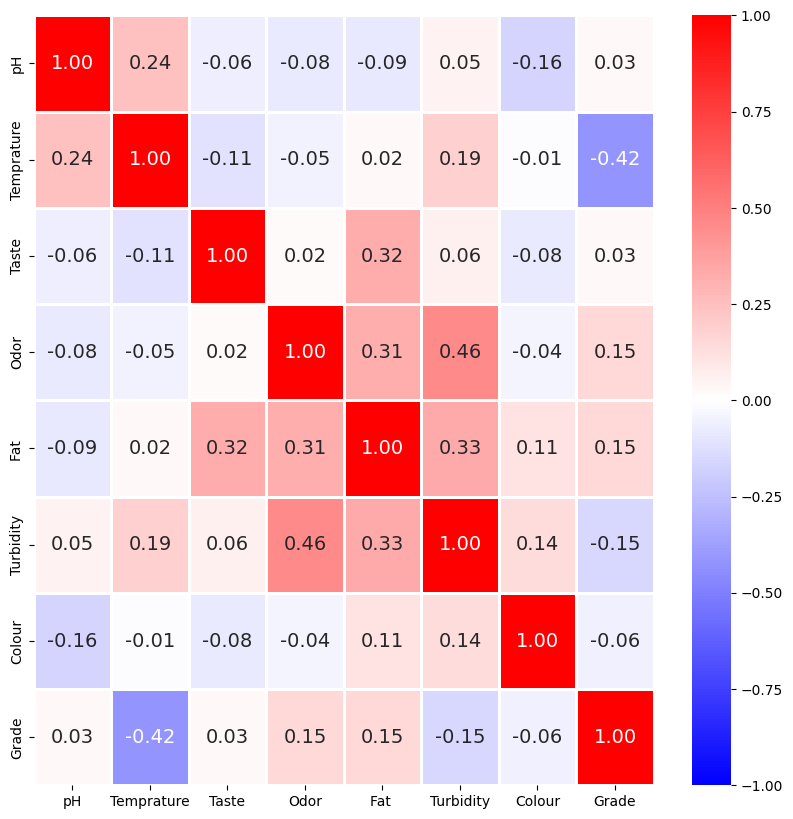

In [14]:
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")

Defining the coordinates.

In [20]:
x = df.drop(['Grade'],axis=1)
y = df['Grade']

Importing the other dependencies for the conclusion.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Showing the train test split value against the coordinates and the size.

In [22]:
X_train

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
899,6.6,43,0,0,1,0,250
635,6.5,38,1,0,0,0,255
310,6.6,37,1,1,1,1,255
961,9.0,43,1,1,1,1,248
723,3.0,40,1,1,1,1,255
...,...,...,...,...,...,...,...
1033,6.6,38,0,0,0,0,255
763,5.6,50,0,1,1,1,255
835,4.7,38,1,0,1,0,255
559,9.0,43,1,0,1,1,250


Importing the other dependencies for the regression model

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


/home/bhaweshsinha/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Creating the prediction parameters and showing the accuracy score.

In [24]:
y_predicted = model.predict(X_test)

In [25]:
model.score(X_test,y_test)

0.7327044025157232

Classification.

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Showing the confusion matrix.

In [27]:
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[113   1   2]
 [  0 116   0]
 [  3  21  62]]


Showing the accuracy score.

In [28]:
print(accuracy_score(y_test,prediction))

0.9150943396226415


Creating the array and drawing the conclusion.

In [31]:
input_data = (8.5,70,1,1,1,1,246)
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction= model.predict(id_reshaped)
print(prediction)

if(prediction[0]== 0):
     print("low")
elif(prediction[0]==2):
     print("high")
else:
     print("MEDIUM")

[0]
low


/home/bhaweshsinha/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
